In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zlib
import zipfile
import os
import gzip
import shutil

In [ ]:
# Download Data,
!git clone https://github.com/4llysa/Weather-Analysis-with-Kolmogorov-s-Complexity.git
data_folder = "Weather-Analysis-with-Kolmogorov-s-Complexity/"

fatal: destination path 'Weather-Analysis-with-Kolmogorov-s-Complexity' already exists and is not an empty directory.


In [ ]:
def get_compression(data):
  data_str = "\n".join(map(str, data))

  with open("data_column.txt", "w", encoding="utf-8") as f:
      f.write(data_str)

  with gzip.open("data_column.gz", "wt", encoding="utf-8") as f:
      f.write(data_str)

  original_size = os.path.getsize("data_column.txt")
  compressed_size = os.path.getsize("data_column.gz")
  return compressed_size / original_size

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_in_months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


# Effect of window size on compression


In [ ]:
def compress(data):
  data_str = "\n".join(map(str, data))

  with open("data_column.txt", "w", encoding="utf-8") as f:
      f.write(data_str)

  with gzip.open("data_column.gz", "wt", encoding="utf-8") as f:
      f.write(data_str)

  original_size = os.path.getsize("data_column.txt")
  compressed_size = os.path.getsize("data_column.gz")

  # print(f"original size: {original_size} bits")
  # print(f"compressed size: {compressed_size} bits")
  # print(f"compression rate: {compressed_size / original_size:.2%}")
  return compressed_size
# get_compression(precipitation_data)

In [ ]:
def avrcompressedbits(variabledata,window_size):
    bitilist = []
    for i in range(len(variabledata)- window_size -1 ):
        window = variabledata[i:i+window_size]
        bitsi = compress(window)/window_size
        bitilist.append(bitsi)
    average = sum(bitilist) / len(bitilist)
    return average

In [ ]:
df = pd.read_csv(data_folder + "orlando_all_2000_2024.csv")
df = df.loc[df[' YEAR'] >= 2020]
data = np.array(df)
precipitation_data_with_date = data[3:, 4].astype(float)
datavector = data[:, 4:8].astype(float)
datavector

array([[0.00e+00, 7.10e+01, 5.30e+01, 6.20e+01],
       [0.00e+00, 8.20e+01, 5.40e+01, 6.80e+01],
       [0.00e+00, 8.50e+01, 6.60e+01, 7.55e+01],
       ...,
       [1.10e+00, 7.90e+01, 6.40e+01, 7.15e+01],
       [3.00e-02, 7.70e+01, 6.60e+01, 7.15e+01],
       [2.60e-01, 7.70e+01, 6.50e+01, 7.10e+01]])

In [ ]:
C = []
for i in range(1,365):
    k = avrcompressedbits(datavector,i)
    C.append(k)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(C, marker='o', linestyle='-', color='b', label='Bits per day')
plt.title('Bits per day', fontsize=16)
plt.xlabel('Window size', fontsize=14)
plt.ylabel('Bits per day', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(C, marker='o', linestyle='-', color='b', label='Bits per day')
plt.title('Bits per day', fontsize=16)
plt.xscale('log')
plt.xlabel('Window size', fontsize=14)
plt.ylabel('Bits per day', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

# Compression of non-discretized time series (without discretization)

## Precipitation data in Tampa

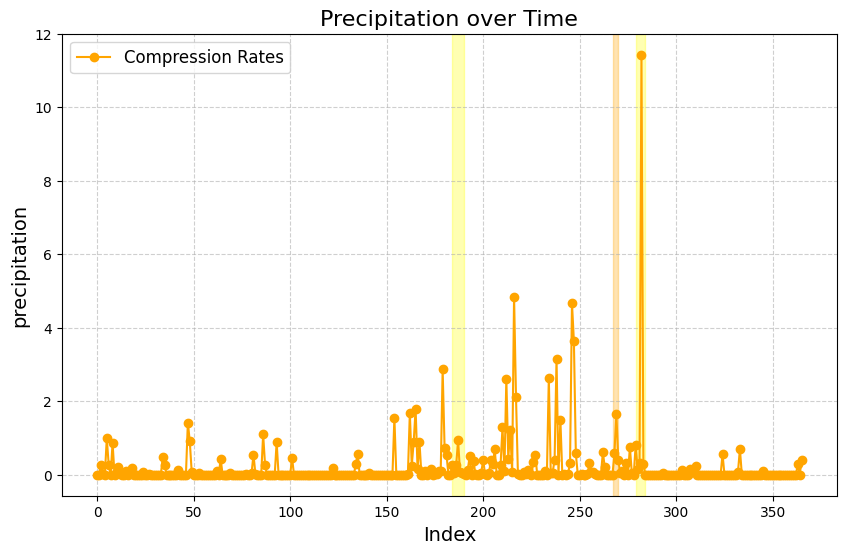

In [ ]:
df = pd.read_csv(data_folder + "tampa_precipitation_2024.csv")
data = np.array(df)
precipitation_data_with_date = data[3:, 4].astype(float)
precipitation_data = data[:, 4].astype(float)

WINDOW_SIZE = 31
arr = []
for i in range(len(precipitation_data)- WINDOW_SIZE-1):
    window = precipitation_data[i:i+WINDOW_SIZE]
    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(precipitation_data, marker='o', linestyle='-', color='orange', label='Compression Rates')
plt.title('Precipitation over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('precipitation', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)


start_date_milton = 279  # October 5, 2019 (cumulative day index)
end_date_milton = 284    # October 10, 2019 (cumulative day index)
plt.axvspan(start_date_milton, end_date_milton, color='yellow', alpha=0.3, label='Highlighted Range')

start_date_helene = 267
end_date_helene = 270
plt.axvspan(start_date_helene, end_date_helene, color='orange', alpha=0.3, label='Highlighted Range')

start_date_debby = 184
end_date_debby = 190
plt.axvspan(start_date_debby, end_date_debby, color='yellow', alpha=0.3, label='Highlighted Range')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Compression Rates over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

start_date_milton = 279  # October 5, 2019 (cumulative day index)
end_date_milton = 284    # October 10, 2019 (cumulative day index)
plt.axvspan(start_date_milton, end_date_milton, color='yellow', alpha=0.3, label='Highlighted Range')

start_date_helene = 267
end_date_helene = 270
plt.axvspan(start_date_helene, end_date_helene, color='orange', alpha=0.3, label='Highlighted Range')

start_date_debby = 184
end_date_debby = 190
plt.axvspan(start_date_debby, end_date_debby, color='yellow', alpha=0.3, label='Highlighted Range')

plt.show()

## Precipitation in Orlando

In [ ]:
df = pd.read_csv(data_folder + "orlando_precipitation_2024.csv")
data = np.array(df)
precipitation_data_with_date = data[3:, 4].astype(float)
precipitation_data = data[:, 4].astype(float)

WINDOW_SIZE = 31
arr = []
for i in range(len(precipitation_data)- WINDOW_SIZE -1 ):
    window = precipitation_data[i:i+WINDOW_SIZE]

    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(precipitation_data, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Precipitation over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('precipitation', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Compression Rates over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [ ]:
df = pd.read_csv(data_folder + "gainsville_precipitation_2024.csv")
data = np.array(df)
precipitation_data_with_date = data[3:, 4].astype(float)
precipitation_data = data[:, 4].astype(float)

WINDOW_SIZE = 31
arr = []
for i in range(len(precipitation_data)- WINDOW_SIZE -1 ):
    window = precipitation_data[i:i+WINDOW_SIZE]

    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(precipitation_data, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Precipitation over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('precipitation', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Compression Rates over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

## Mean Temperature

In [ ]:
df = pd.read_csv(data_folder + "tampa_mean_temp_2024.csv")
data = np.array(df)
precipitation_data_with_date = data[3:, 4].astype(float)
precipitation_data = data[:, 4].astype(float)

WINDOW_SIZE = 31
arr = []
for i in range(len(precipitation_data)- WINDOW_SIZE -1 ):
    window = precipitation_data[i:i+WINDOW_SIZE]

    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(precipitation_data, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Mean Temp over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('mean temp', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label='Compression Rates')
plt.title('Compression Rates over Time', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

# Compression of non-discretized time series with discretization

In [ ]:
bins = [0, 0.1, 0.25, 0.5, 1.0, np.inf]  # Define bin edges
labels = [0, 1, 2, 3, 4]  # Define labels for the bins
df['precipitation_level'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded as df
# Discretize the 'precipitation' column into 5 equal-sized bins (quantiles)
df['precipitation_level'] = pd.qcut(df[' precipitation'], q=5, labels=[1, 2, 3, 4, 5])

# Plotting the distribution of precipitation levels
plt.figure(figsize=(10, 6))
df['precipitation_level'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Precipitation Levels (Quantiles)', fontsize=16)
plt.xlabel('Precipitation Level (Quantile)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Compression of weather vector time series

## Tampa, 2024

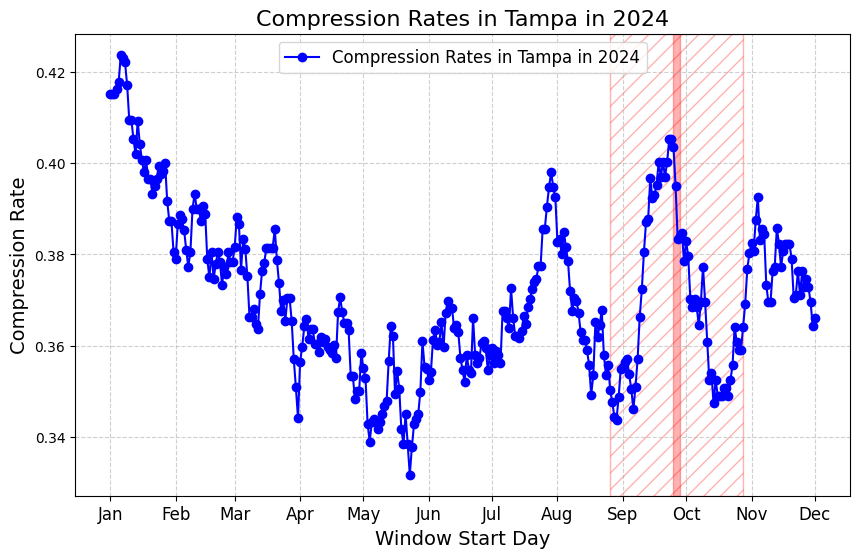

In [ ]:
df = pd.read_csv(data_folder + "tampa_all_2024.csv")
data = np.array(df)
data = data[:, -4:].astype(str)
vectorized_data = np.array([' '.join(row) for row in data])
WINDOW_SIZE = 31
arr = []

for i in range(len(vectorized_data)- WINDOW_SIZE):
    window = vectorized_data[i:i+WINDOW_SIZE]
    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label='Compression Rates in Tampa in 2024')
plt.title('Compression Rates in Tampa in 2024', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
cumulative_days = np.cumsum([0] + days_in_months[:-1])  # Start at 0 for January
plt.xticks(cumulative_days, months, fontsize=12)


start_date_milton = 279
end_date_milton = 284
# plt.axvspan(start_date_milton, end_date_milton, color='orange', alpha=0.3, label='Highlighted Range')
# plt.axvspan(start_date_milton-30, end_date_milton+30, facecolor='none', edgecolor='orange', hatch='\\\\', alpha=0.3, label='Highlighted Range')

start_date_helene = 267
end_date_helene = 270
plt.axvspan(start_date_helene, end_date_helene, color='red', alpha=0.3, label='Highlighted Range')
plt.axvspan(start_date_helene-30, end_date_helene+30, facecolor='none', edgecolor='red', hatch='//', alpha=0.3, label='Highlighted Range')

start_date_debby = 215
# end_date_debby = 220
# plt.axvspan(start_date_debby, end_date_debby, color='yellow', alpha=0.3, label='Highlighted Range')
# plt.axvspan(start_date_debby-30, end_date_debby+30, facecolor='none', edgecolor='yellow', hatch='//', alpha=0.8, label='Highlighted Range')
plt.xlabel('Window Start Day', fontsize=14)
plt.show()
# print(arr)

## Orlando 2000-2024

In [ ]:
df = pd.read_csv(data_folder + "orlando_all_2000_2024.csv")
YEAR_TO_RUN = 2022
WINDOW_SIZE = 31

df = df.loc[df[' YEAR'] == YEAR_TO_RUN]
data = np.array(df)
data = data[:, -4:].astype(str)
vectorized_data = np.array([' '.join(row) for row in data])
arr = []

for i in range(len(vectorized_data)- WINDOW_SIZE -1 ):
    window = vectorized_data[i:i+WINDOW_SIZE]
    arr.append(get_compression(window))

plt.figure(figsize=(10, 6))
plt.plot(arr, marker='o', linestyle='-', color='b', label=f'Compression Rate with window size {WINDOW_SIZE}')
plt.title(f'Compression Rates in Orlando in {YEAR_TO_RUN}', fontsize=16)
plt.xlabel('Window Start Day', fontsize=14)
plt.ylabel('Compression Rate', fontsize=14)

if YEAR_TO_RUN % 4 == 0:  # Check for leap year
    days_in_months[1] = 29
else:
    days_in_months[1] = 28

# Set months on x axis
cumulative_days = np.cumsum([0] + days_in_months[:-1])  # Start at 0 for January
plt.xticks(cumulative_days, months, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()